In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from bandits import *
from client import *
from server import *
from bandits_improved import *
from client_improved import *
from server_improved import *

Performance

In [2]:
T = 1000000
K = 9
M = 4
alpha_list = np.array([0, 0.2, 0.5, 0.9, 1])
#means = np.random.random((M, K))


means = np.array([[1 , 0, 0, 0, 0.9, 0.4, 0.35, 0.35, 0.5],
                  [0, 1, 0, 0, 0.3, 0.9, 0.35, 0.3, 0.5],
                  [0, 0, 1, 0, 0.35, 0.35, 0.9, 0.3, 0.5],
                  [0, 0, 0, 1, 0.4, 0.3, 0.35, 0.9, 0.5]])

n_simu = 10

print(means)

[[1.   0.   0.   0.   0.9  0.4  0.35 0.35 0.5 ]
 [0.   1.   0.   0.   0.3  0.9  0.35 0.3  0.5 ]
 [0.   0.   1.   0.   0.35 0.35 0.9  0.3  0.5 ]
 [0.   0.   0.   1.   0.4  0.3  0.35 0.9  0.5 ]]


In [3]:
def fp(p):
    return 2**p*np.log(T)

In [4]:
# try to load for a warm restart
try:
    regret_reward = np.load('scores/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('scores/raw_regret.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('scores/local_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('scores/global_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('scores/mixed_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}

In [5]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            pfed = PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    np.save('scores/raw_regret.npy', raw_regret)
    np.save('scores/local_reward.npy',local_reward)
    np.save('scores/global_reward.npy',global_reward)
    np.save('scores/mixed_reward.npy',mixed_reward)
    np.save('scores/regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(round(alpha,2))]))
    np.save('scores/raw_regret.npy', raw_regret)
    np.save('scores/local_reward.npy',local_reward)
    np.save('scores/global_reward.npy',global_reward)
    np.save('scores/mixed_reward.npy',mixed_reward)
    np.save('scores/regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:0.0: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:0.2: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:0.5: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:0.9: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:1.0: 0it [00:00, ?it/s]


/Users/georgivitanov/opt/anaconda3/envs/nof1/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/georgivitanov/opt/anaconda3/envs/nof1/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


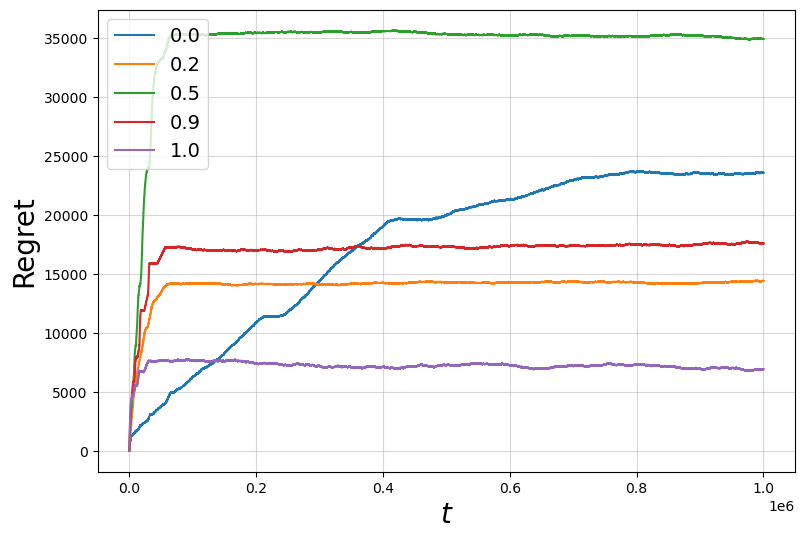

In [6]:
try:
    regret_reward = np.load('scores/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=str(alpha))
plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)

Enhancement

In [7]:
T = 500000

K = 9
M = 4
alpha_list = np.array([0.5])
means = np.load("means.npy")
n_simu = 10

In [8]:
# try to load for a warm restart
try:
    regret_reward = np.load('scores_improved/imp_regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('scores_improved/imp_raw_regret.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('scores_improved/imp_local_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('scores_improved/imp_global_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('scores_improved/imp_mixed_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}

In [9]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("Imp P-Fed-UCB, alpha:"+str(alpha))):
            pfed = IMP_PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    np.save('scores_improved/imp_raw_regret.npy', raw_regret)
    np.save('scores_improved/imp_local_reward.npy',local_reward)
    np.save('scores_improved/imp_global_reward.npy',global_reward)
    np.save('scores_improved/imp_mixed_reward.npy',mixed_reward)
    np.save('scores_improved/imp_regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(alpha)]))
    np.save('scores_improved/imp_raw_regret.npy', raw_regret)
    np.save('scores_improved/imp_local_reward.npy',local_reward)
    np.save('scores_improved/imp_global_reward.npy',global_reward)
    np.save('scores_improved/imp_mixed_reward.npy',mixed_reward)
    np.save('scores_improved/imp_regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, regret_reward

Simulating Imp P-Fed-UCB, alpha:0.5: 0it [00:00, ?it/s]


In [10]:
# try to load for a warm restart
try:
    regret_reward = np.load('scores_improved/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('scores_improved/raw_regret.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('scores_improved/local_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('scores_improved/global_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('scores_improved/mixed_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}

In [11]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            pfed = PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    np.save('scores_improved/raw_regret.npy', raw_regret)
    np.save('scores_improved/local_reward.npy',local_reward)
    np.save('scores_improved/global_reward.npy',global_reward)
    np.save('scores_improved/mixed_reward.npy',mixed_reward)
    np.save('scores_improved/regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(alpha)]))
    np.save('scores_improved/raw_regret.npy', raw_regret)
    np.save('scores_improved/local_reward.npy',local_reward)
    np.save('scores_improved/global_reward.npy',global_reward)
    np.save('scores_improved/mixed_reward.npy',mixed_reward)
    np.save('scores_improved/regret_reward.npy', regret_reward)
    del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:0.5: 0it [00:00, ?it/s]


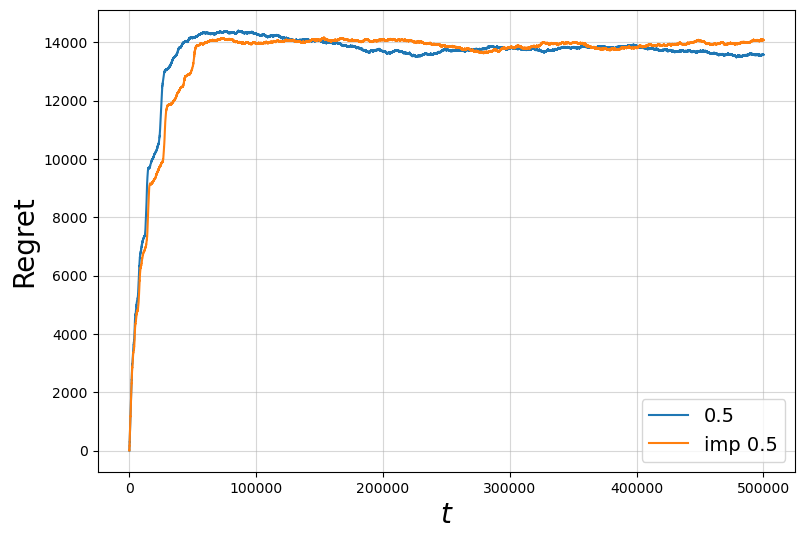

In [12]:
try:
    regret_reward = np.load('scores_improved/regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=str(alpha))
    
try:
    regret_reward = np.load('scores_improved/imp_regret_reward.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label='imp '+str(alpha))   

plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)

In [13]:
T = 20000000

#alpha_list = np.linspace(0, 1, num=6)
alpha_list = np.array([0, 0.1,0.9, 1])
#means = np.random.random((M, K))


means = np.load("movielens_norm_10_40.npy")
M = means.shape[0]
K = means.shape[1]

n_simu = 10

In [17]:
# try to load for a warm restart
try:
    regret_reward = np.load('scores_movielens/raw_regret_reward_10_40.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
try:  
    raw_regret = np.load('scores_movielens/raw_regret_10_40.npy',allow_pickle=True).item()
except FileNotFoundError:
    raw_regret = {}
    
try:  
    local_reward = np.load('scores_movielens/local_reward_10_40.npy',allow_pickle=True).item()
except FileNotFoundError:
    local_reward = {}
    
try:  
    global_reward = np.load('scores_movielens/global_reward_10_40.npy',allow_pickle=True).item()
except FileNotFoundError:
    global_reward = {}
    
try:  
    mixed_reward = np.load('scores_movielens/mixed_reward_10_40.npy',allow_pickle=True).item()
except FileNotFoundError:
    mixed_reward = {}

In [18]:
try:
    for alpha in alpha_list:
        try:
            # the number of runs to run for this algo
            nalgo = n_simu-len(raw_regret[str(round(alpha,2))])
        except KeyError:
            # case of algo not loaded (ie 0 run already done)
            raw_regret[str(round(alpha,2))] = []
            local_reward[str(round(alpha,2))] = []
            global_reward[str(round(alpha,2))] = []
            mixed_reward[str(round(alpha,2))] = []
            nalgo = n_simu

        for i in tqdm.tqdm(range(nalgo), desc="Simulating {}".format("P-Fed-UCB, alpha:"+str(alpha))):
            pfed = PFEDUCB(fp, T, means, alpha) # simulate a run with the chosen parameters
            mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1 = pfed.simulate()
            raw_regret[str(round(alpha,2))].append(mixed_regret_1)  
            local_reward[str(round(alpha,2))].append(local_reward_1)
            global_reward[str(round(alpha,2))].append(global_reward_1)
            mixed_reward[str(round(alpha,2))].append(mixed_reward_1)
            
            regret_reward[str(round(alpha,2))] = [np.mean(raw_regret[str(round(alpha,2))], axis=0),
                                np.std(raw_regret[str(round(alpha,2))], axis=0),
                                np.min(raw_regret[str(round(alpha,2))], axis=0),
                                np.max(raw_regret[str(round(alpha,2))], axis=0),
                                np.mean(local_reward[str(round(alpha,2))], axis=0),
                                np.mean(global_reward[str(round(alpha,2))], axis=0),
                                np.mean(mixed_reward[str(round(alpha,2))], axis=0)]
            
            del mixed_regret_1, local_reward_1, global_reward_1, mixed_reward_1

    # also saves the scores if we ran the whole algorithm without interrupting
    np.save('scores_movielens/raw_regret_10_40.npy', raw_regret)
    np.save('scores_movielens/local_reward_10_40.npy',local_reward)
    np.save('scores_movielens/global_reward_10_40.npy',global_reward)
    np.save('scores_movielens/mixed_reward_10_40.npy',mixed_reward)
    np.save('scores_movielens/regret_reward_10_40.npy', regret_reward)
    del raw_regret, local_reward, global_reward, mixed_reward, regret_reward

    
except KeyboardInterrupt:
    # save in case of interruption
    print('alpha:', alpha, 'Number of tries ran: ', len(raw_regret[str(round(alpha,2))]))
    np.save('scores_movielens/raw_regret_10_40.npy', raw_regret)
    np.save('scores_movielens/local_reward_10_40.npy',local_reward)
    np.save('scores_movielens/global_reward_10_40.npy',global_reward)
    np.save('scores_movielens/mixed_reward_10_40.npy',mixed_reward)
    np.save('scores_movielens/regret_reward_10_40.npy', regret_reward)
    del raw_regret, local_reward, global_reward, regret_reward

Simulating P-Fed-UCB, alpha:0.0: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:0.1: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:0.9: 0it [00:00, ?it/s]
Simulating P-Fed-UCB, alpha:1.0: 0it [00:00, ?it/s]


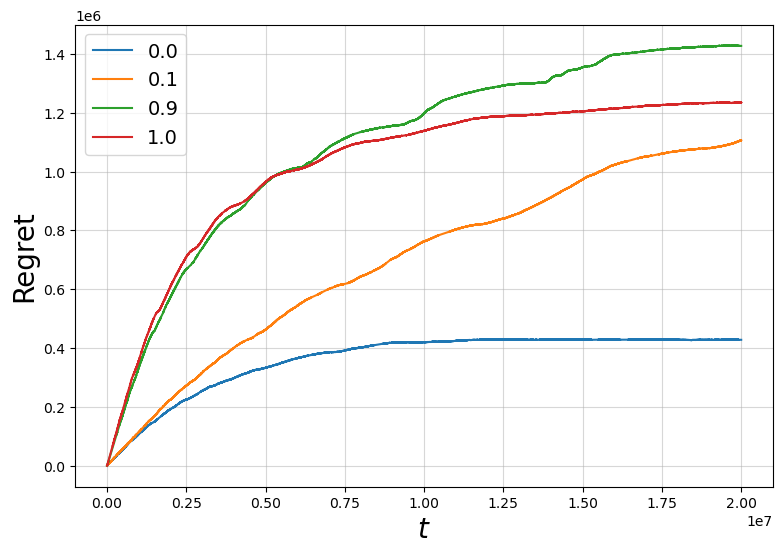

In [ ]:
try:
    regret_reward = np.load('scores_movielens/regret_reward_10_40.npy',allow_pickle=True).item()
except FileNotFoundError:
    regret_reward = {}
    
horizon_plot = -1
fig = plt.figure(1,figsize=(9,6))
for alpha in alpha_list:
    plt.plot(regret_reward[str(round(alpha,2))][0][:horizon_plot], label=str(alpha))
plt.xlabel('$t$', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)